In [193]:
import numpy as np
%matplotlib inline
from pylab import *
import ccdproc
from ccdproc import ImageFileCollection
import astropy
import astropy.units as u

In [2]:
path = "/Volumes/GoogleDrive/My Drive/Observing/2018A/Feb 9 10 11- Swope/TEST"

In [6]:
data = astropy.nddata.CCDData.read(path + "/ccd3001c1.fits", unit='adu')

INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]


In [70]:
ic = ImageFileCollection(path)
ic.summary[1]

file,simple,bitpix,naxis,naxis1,naxis2,bscale,bzero,bunit,origin,observer,telescop,sitename,sitealt,sitelat,sitelong,timezone,date-obs,ut-date,ut-time,ut-end,lc-time,night,instrume,scale,egain,enoise,nopamps,opamp,choffx,choffy,dispaxis,ra,ra-d,dec,dec-d,equinox,asecs,dsecs,epoch,airmass,st,telfocus,casspos,filename,object,exptype,exptime,nloops,loop,binning,speed,noverscn,nbiaslns,biassec,datasec,trimsec,filter,wheel1,wheel2,subrastr,tempccd,vgauge,igauge,software,fitsvers,comment
str14,bool,int64,int64,int64,int64,float64,float64,str8,str8,str4,str5,str3,int64,float64,float64,int64,str10,str10,str8,str8,str8,str9,str14,float64,float64,float64,int64,int64,float64,float64,int64,str11,float64,str11,float64,float64,float64,float64,float64,float64,float64,float64,float64,str9,str5,str4,float64,int64,int64,str3,str5,int64,int64,str21,str15,str15,str1,str1,str4,str4,float64,float64,float64,str46,str3,str6
ccd3001c2.fits,True,16,2,2176,2184,1.0,32768.0,DU/PIXEL,LCO/OCIW,UCSC,Swope,LCO,2280,-29.083,-70.698,4,2018-02-07,2018-02-07,22:55:23,22:55:23,19:55:23,07Feb2018,Direct/4Kx4K-4,0.435,1.04,3.2,4,2,445.44,447.18,0,03:20:46.8,50.1949583,-29:16:28.3,-29.2745361,2000.0,431.0,441.0,2018.10399,1.0,12277.5,0.0,0.0,ccd2134c2,bias,Bias,0.0,1,1,1x1,Turbo,128,128,"[2049:2176,2057:2184]","[1:2048,1:2056]","[1:2048,1:2056]",u,u,Open,none,-111.7,3.16e-05,2.63e-07,"Version 1.4.2 (1.0421) (May 16 2017, 13:14:35)",1.2,"=,,,,,"


In [224]:
raw.header["TRIMSEC"]

'[1:2048,1:2056]'

In [ ]:
imshow

In [287]:
def collect_set(collect_by, path=path, combine='average', trim="[2:2047,2:2055]",
               bias={1: None, 2: None, 3: None, 4: None}):
    """ Four amplifier combine independent on Swope """
    ic = ImageFileCollection(path)
    
    ccdargs = {"unit": "adu"}

    peramp = {1: [], 2: [], 3: [], 4: []}

    for ccd, fname in ic.ccds(**collect_by, return_fname=True, ccd_kwargs=ccdargs):
        
        dat = ccdproc.ccd_process(ccd, oscan=ccd[:,2049:], trim=trim,
                                error=True,
                                master_bias=bias[raw.header["OPAMP"]],
                                gain=raw.header["EGAIN"]*u.electron/u.adu, 
                                readnoise=raw.header["ENOISE"]*u.electron)

        peramp[dat.header["OPAMP"]].append(dat)

    
    combined = {}

    for opamp, ccds in peramp.items():
        if combine=='average':
            mb = ccdproc.Combiner(ccds, dtype=np.float64).average_combine()
        combined[opamp] = mb

    return combined


In [295]:
masterbias = collect_set(collect_by={"object": "BIAS"})
skyflat_u = collect_set(collect_by={"object": "SFLAT", "filter": "u"}, bias=masterbias)

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.
/Users/npk/Dropbox/virtualenv/astropy/lib/python3.6/site-packages/ccdproc/core.py:336: RuntimeWarning: invalid value encountered in sqrt
  var = (gain_value * ccd_data.data + readnoise_value ** 2) ** 0.5
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]


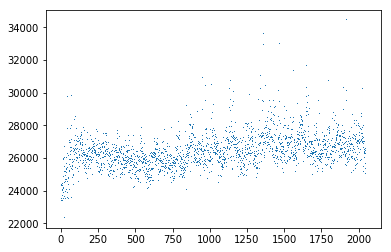

In [284]:
plot(skyflat[3][100], ',')

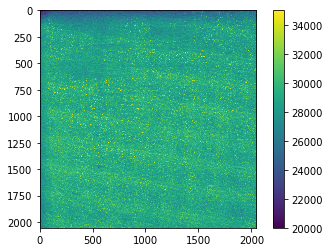

In [285]:
imshow(skyflat[2], vmin=20000, vmax=35000)
colorbar()

In [234]:
ic = ImageFileCollection(path)
ccdargs = {"unit": "adu"}

biases = {1: [], 2: [], 3: [], 4: []}

for ccd, fname in ic.ccds(object='BIAS', return_fname=True, ccd_kwargs=ccdargs):

    dat = ccdproc.ccd_process(ccd, oscan=ccd[:,2049:], trim="[2:2047,2:2055]",
                            error=True,
                            gain=raw.header["EGAIN"]*u.electron/u.adu, 
                            readnoise=raw.header["ENOISE"]*u.electron)
    
    biases[dat.header["OPAMP"]].append(dat)


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.
/Users/npk/Dropbox/virtualenv/astropy/lib/python3.6/site-packages/ccdproc/core.py:336: RuntimeWarning: invalid value encountered in sqrt
  var = (gain_value * ccd_data.data + readnoise_value ** 2) ** 0.5
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]
INFO

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.


: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit DU/PIXEL in the FITS file. [astropy.nddata.ccddata]


In [240]:
master_biases = {}

for opamp, ccds in biases.items():
    mb = ccdproc.Combiner(ccds).average_combine()
    master_biases[opamp] = mb

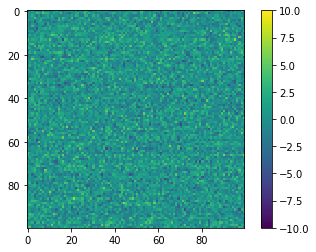

In [239]:
imshow(master_biases[1][100:200,100:200],vmin=-10, vmax=10)
colorbar()

In [194]:
raw = ccd`

dat = ccdproc.ccd_process(raw, oscan=raw[:,2049:], trim=raw.header["TRIMSEC"], 
                            error=True,
                            gain=raw.header["EGAIN"]*u.electron/u.adu, 
                            readnoise=raw.header["ENOISE"]*u.electron)

In [181]:
raw.header

SIMPLE  =                    T                                                  
BITPIX  =                   16                                                  
NAXIS   =                    2                                                  
NAXIS1  =                 2176                                                  
NAXIS2  =                 2184                                                  
BSCALE  =           1.00000000         / real=bzero+bscale*value                
BZERO   =       32768.00000000                                                  
BUNIT   = 'DU/PIXEL'                                                            
ORIGIN  = 'LCO/OCIW'                                                            
OBSERVER= 'UCSC'                                                                
TELESCOP= 'Swope'                      / telescope                              
SITENAME= 'LCO'                                                                 
SITEALT =                 22